# 지적장애인을 위한 운동 처방 추천 서비스

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#전처리리 과정에서 만든 결측치가 제거된 데이터를 csv로 저장 후, 활용
disabled_data = pd.read_csv("/content/drive/MyDrive/new_data/disabled_drop_nan2.csv", sep=",")
normal_data = pd.read_csv("/content/drive/MyDrive/new_data/normal_drop_nan2.csv", sep=",")

In [ ]:
#등급별 데이터터 분리
disabled_1 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='1등급')]
disabled_2 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='2등급')]
disabled_3 = disabled_data[(disabled_data['label']==1) & (disabled_data['disabled_grade']=='3등급')]

In [ ]:
#필요없는 열: 장애종류,장애등급 삭제
drop = ['disabled_type','disabled_grade']
disabled_1 = disabled_1.drop(drop, axis = 1).reset_index(drop=True)
disabled_2 = disabled_2.drop(drop, axis = 1).reset_index(drop=True)
disabled_3 = disabled_3.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
#필요없는 열: 운동처방 삭제, 후에 매칭한 후에 활용할 계획
drop = ['exercise_prescription']
normal_data1 = normal_data.drop(drop, axis = 1).reset_index(drop=True)

In [ ]:
data1 = pd.concat([disabled_1,normal_data1])
data2 = pd.concat([disabled_2,normal_data1])
data3 = pd.concat([disabled_3,normal_data1])

In [ ]:
#col name 재정의
data1.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']
data2.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']
data3.columns = ['age',	'measure_time',	'sex',	'systolic_bp',	'diastolic_bp',	'height',	'Weight',	'BMI',	'body_fat',	'grip_power',	'sit_up',	'step_inspection',	'step_recover_time',	'bending_forward',	'label']

## 1등급

In [ ]:
#pip install git+https://github.com/benmiroglio/pymatch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/benmiroglio/pymatch to /tmp/pip-req-build-z9aoq0b1
  Running command git clone -q https://github.com/benmiroglio/pymatch /tmp/pip-req-build-z9aoq0b1
  Created wheel for pymatch: filename=pymatch-0.3.4.2-py3-none-any.whl size=10081 sha256=10a664abbe8012cf7823e104c99d7fc81cb3fa78157e602689be5ddb01b18302
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3_q0d23/wheels/72/7d/d4/a4dec84ebaa333338d923cb7aa8d57af132259d5bdf7b049c4
Successfully built pymatch


In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data1[data1['label']==0], data1[data1['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 5640


In [ ]:
#dataframe 형태여서 0%가가 나온 것임
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

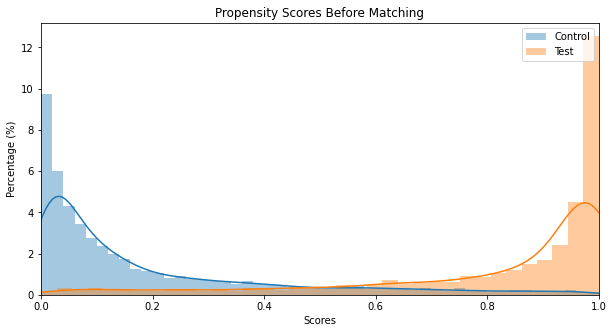

In [ ]:
#propensity score 한눈에 보기
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data1 = m.matched_data.sort_values("match_id")

In [ ]:
data1

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019,1,6.0,47.4,89.0,133.0,0.992611,0,15305
579,22.0,56.3,18.0,0.0,30.1,71.0,5.6,160.0,0,2018,1,1.0,93.0,53.0,114.0,0.993932,0,579
15306,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019,1,13.0,47.4,91.0,139.0,0.994907,1,15306
553,19.8,45.4,15.0,-6.0,28.3,81.0,9.9,151.5,0,2018,1,1.0,119.0,50.5,116.0,0.994523,1,553
15307,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019,1,15.0,46.2,112.0,122.0,0.839395,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,41.1,120.4,14.0,7.0,50.1,73.0,5.4,171.1,0,2018,1,1.0,95.0,36.8,118.0,0.999524,5637,568
20943,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021,1,11.0,45.5,88.0,129.0,0.896174,5638,20943
10082,23.8,64.3,13.0,-3.0,30.3,81.0,25.7,164.5,0,2021,1,6.0,143.0,44.3,121.0,0.896728,5638,10082
20944,21.9,50.6,50.0,16.8,36.7,86.0,17.5,151.9,1,2021,0,14.0,35.6,89.0,132.0,0.444879,5639,20944


In [ ]:
#data1.to_csv('/content/drive/MyDrive/new_data/data1.csv', index = None)

In [ ]:
num = list(data1[data1['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [ ]:
#장애인 데이터 + 매칭된 비장애인의 운동처방 데이터
result1 = pd.concat([data1[data1['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result1.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result1

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,19.3,43.2,49.0,-10.0,36.0,88.0,11.1,149.8,1,2019,1,6.0,47.4,89.0,133.0,0.992611,0,15305,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
1,18.5,48.7,47.0,-3.0,21.5,100.0,6.0,162.4,1,2019,1,13.0,47.4,91.0,139.0,0.994907,1,15306,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
2,22.5,66.3,26.0,-0.2,20.4,77.0,22.4,171.6,1,2019,1,15.0,46.2,112.0,122.0,0.839395,2,15307,"준비운동:상지 루틴 스트레칭,하지 루틴 스트레칭1 / 본운동:달리기,걷기,누워서 다..."
3,18.9,52.5,38.0,16.7,14.5,89.0,10.3,166.8,1,2019,1,10.0,48.9,92.0,134.0,0.958044,3,15308,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
4,22.6,59.2,36.0,-15.0,28.7,79.0,12.9,161.8,1,2019,1,7.0,51.4,66.0,127.0,0.993188,4,15309,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,18.5,50.8,41.0,-20.0,31.4,99.0,9.5,165.6,1,2021,1,1.0,42.3,130.0,152.0,0.996733,5635,20940,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
5636,21.7,47.2,38.0,-20.0,33.2,54.0,11.3,147.6,1,2021,1,2.0,42.0,123.0,105.0,0.994284,5636,20941,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
5637,34.8,71.2,41.0,-20.0,49.4,83.0,11.3,143.0,1,2021,1,2.0,35.0,116.0,126.0,0.999906,5637,20942,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."
5638,24.5,74.3,34.0,-20.0,21.7,52.0,23.8,174.3,1,2021,1,11.0,45.5,88.0,129.0,0.896174,5638,20943,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:맨몸운동 루틴프로그램,바운딩 운동 ..."


## 2등급

In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data2[data2['label']==0], data2[data2['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 8116


In [ ]:
#dataframe 형태여서 0%가가 나온 것임
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

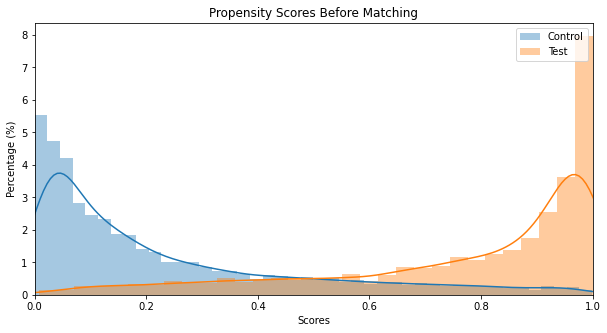

In [ ]:
#propensity score 한눈에 보기
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data2 = m.matched_data.sort_values("match_id")

In [ ]:
data2

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019,1,4.0,33.8,138.0,149.0,0.985637,0,15305
13040,34.8,88.7,15.0,6.0,49.2,79.0,10.8,159.7,0,2021,0,4.0,130.0,29.3,108.0,0.985891,0,13040
15306,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019,1,13.0,52.3,88.0,142.0,0.956499,1,15306
9724,26.6,74.3,13.0,-7.5,37.8,69.0,20.5,167.1,0,2021,1,12.0,142.0,42.4,117.0,0.956255,1,9724
15307,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019,1,23.0,48.2,95.0,115.0,0.703119,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,20.8,35.2,16.0,11.0,34.1,77.0,5.9,130.2,0,2021,0,13.0,137.0,39.3,141.0,0.909185,8113,1078
23419,24.7,49.4,13.0,-0.5,37.8,72.0,11.2,141.5,1,2021,1,14.0,45.2,126.0,112.0,0.995173,8114,23419
593,25.2,75.0,16.0,-9.0,22.1,82.0,8.9,172.5,0,2018,1,1.0,83.0,50.4,131.0,0.994735,8114,593
23420,20.2,57.9,35.0,2.6,13.1,80.0,36.6,169.3,1,2021,1,20.0,47.4,90.0,120.0,0.350023,8115,23420


In [ ]:
#data2.to_csv('/content/drive/MyDrive/new_data/data2.csv', index = None)

In [ ]:
num = list(data2[data2['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [ ]:
#장애인 데이터 + 매칭된 비장애인의 운동처방 데이터
result2 = pd.concat([data2[data2['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result2.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result2

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,28.7,67.8,54.0,10.6,35.7,96.0,21.0,153.8,1,2019,1,4.0,33.8,138.0,149.0,0.985637,0,15305,본운동:정적 스트레칭 루틴프로그램
1,20.7,43.7,28.0,11.0,17.7,78.0,14.1,145.4,1,2019,1,13.0,52.3,88.0,142.0,0.956499,1,15306,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:맨몸운동 루틴프로그램,바운딩 운동 ..."
2,20.9,54.2,36.0,12.0,24.8,81.0,23.6,161.2,1,2019,1,23.0,48.2,95.0,115.0,0.703119,2,15307,"본운동:옆으로 누워 버티기,누워서 다리 들어올리기,네발기기 자세로 팔 다리 들기,윗..."
3,21.4,56.5,42.0,22.5,23.6,75.0,15.0,162.5,1,2019,0,20.0,37.5,90.0,118.0,0.240029,3,15308,"준비운동:상지 루틴 스트레칭,하지 루틴 스트레칭1 / 본운동:달리기,걷기,누워서 다..."
4,20.5,49.8,23.0,16.0,33.6,70.0,16.4,155.7,1,2019,0,7.0,42.4,86.0,98.0,0.454300,4,15309,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:맨몸운동 루틴프로그램,바운딩 운동 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,18.2,41.5,25.0,-37.0,24.4,78.0,16.9,151.1,1,2021,0,10.0,38.7,123.0,121.0,0.958294,8111,23416,"준비운동:허리 굽혀 팔 뒤로 들기,물병 옆으로 들어올리기,팔꿈치 굽히기,팔굽혀 펴기..."
8112,18.7,44.2,30.0,20.9,11.8,64.0,25.6,153.7,1,2021,1,31.0,56.4,31.0,109.0,0.317225,8112,23417,"본운동:앉아서 다리 밀기,앉았다 일어서기,엎드려 버티기,목 스트레칭,엉덩이 스트레칭..."
8113,27.4,68.7,24.0,8.3,42.2,83.0,8.5,158.3,1,2021,0,10.0,30.7,148.0,138.0,0.910227,8113,23418,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:맨몸운동 루틴프로그램,바운딩 운동 ..."
8114,24.7,49.4,13.0,-0.5,37.8,72.0,11.2,141.5,1,2021,1,14.0,45.2,126.0,112.0,0.995173,8114,23419,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:순간반응 콘 찍기,앉았다 일어나며 점..."


## 3등급

In [ ]:
from pymatch.Matcher import Matcher
m = Matcher(data3[data3['label']==0], data3[data3['label']==1], yvar="label", exclude=['age','measure_time','step_inspection','step_recover_time'])

Formula:
label ~ BMI+Weight+bending_forward+body_fat+diastolic_bp+grip_power+height+sex+sit_up+systolic_bp
n majority: 15305
n minority: 5911


In [ ]:
#dataframe 형태여서 0%가가 나온 것임
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 0.0%


In [ ]:
m.predict_scores()

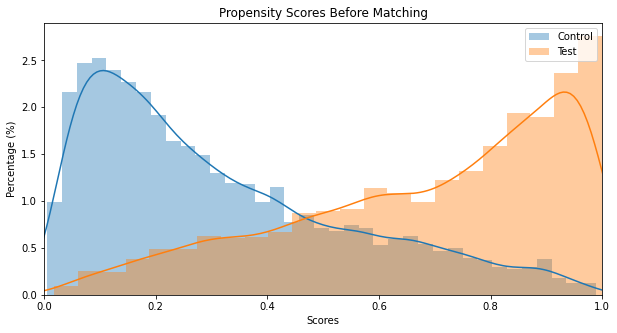

In [ ]:
#propensity score 한눈에 보기
m.plot_scores()

In [ ]:
m.match(method="min", nmatches=1, threshold=0.01)

In [ ]:
data3 = m.matched_data.sort_values("match_id")

In [ ]:
data3

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id
15305,21.0,43.8,51.0,18.0,33.9,74.0,12.0,144.5,1,2019,0,14.0,38.6,78.0,103.0,0.601199,0,15305
12537,18.6,38.6,15.0,2.5,35.9,72.0,17.7,144.1,0,2021,0,18.0,163.0,37.9,118.0,0.601266,0,12537
15306,25.8,72.6,24.0,3.7,42.1,80.0,19.7,167.8,1,2019,0,13.0,35.1,108.0,120.0,0.539023,1,15306
10955,25.6,61.1,17.0,18.5,41.3,80.0,24.3,154.4,0,2021,0,1.0,158.0,34.5,134.0,0.539142,1,10955
15307,18.8,55.0,25.0,3.6,18.9,80.0,17.4,171.2,1,2019,1,23.0,54.5,74.0,120.0,0.638907,2,15307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13472,27.1,66.9,14.0,14.0,36.9,85.0,21.1,157.0,0,2022,0,10.0,135.0,33.8,115.0,0.697334,5908,13472
21214,25.7,71.6,58.0,-4.5,20.1,75.0,45.4,167.0,1,2021,1,26.0,41.1,79.0,105.0,0.693131,5909,21214
14136,28.3,84.8,17.0,-6.5,28.5,76.0,37.0,173.0,0,2022,1,37.0,171.0,40.9,127.0,0.693063,5909,14136
21215,23.7,55.4,70.0,-15.0,38.5,78.0,11.3,152.8,1,2021,0,3.0,25.4,132.0,131.0,0.934637,5910,21215


In [ ]:
#data3.to_csv('/content/drive/MyDrive/new_data/data3.csv', index = None)

In [ ]:
num = list(data3[data3['label']==0].index)
exercise_prescription = pd.DataFrame(normal_data['exercise_prescription'][i] for i in num)

In [ ]:
#장애인 데이터 + 매칭된 비장애인의 운동처방 데이터
result3 = pd.concat([data3[data3['label']==1].reset_index(drop=True),exercise_prescription], axis=1)
result3.columns = ['BMI', 'Weight',	'age',	'bending_forward',	'body_fat',	'diastolic_bp',	'grip_power',	'height', 'label',	'measure_time',	'sex',	'sit_up',	'step_inspection',	'step_recover_time',	'systolic_bp',	'scores', 'match_id', 'record_id', 'exercise_prescription']
result3

,BMI,Weight,age,bending_forward,body_fat,diastolic_bp,grip_power,height,label,measure_time,sex,sit_up,step_inspection,step_recover_time,systolic_bp,scores,match_id,record_id,exercise_prescription
0,21.0,43.8,51.0,18.0,33.9,74.0,12.0,144.5,1,2019,0,14.0,38.6,78.0,103.0,0.601199,0,15305,"본운동:상지 루틴 스트레칭,앉았다 일어서기,팔굽혀펴기,윗몸올리기 ,스텝박스,하지 루..."
1,25.8,72.6,24.0,3.7,42.1,80.0,19.7,167.8,1,2019,0,13.0,35.1,108.0,120.0,0.539023,1,15306,"준비운동:동적 스트레칭 루틴프로그램 / 본운동:맨몸운동 루틴프로그램,바운딩 운동 ..."
2,18.8,55.0,25.0,3.6,18.9,80.0,17.4,171.2,1,2019,1,23.0,54.5,74.0,120.0,0.638907,2,15307,"본운동:등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,허리 스트레칭,배스트레칭,엉..."
3,25.3,72.2,44.0,-33.0,27.2,97.0,36.2,168.8,1,2019,1,10.0,45.6,76.0,136.0,0.985245,3,15308,"본운동:앉았다 일어서기,매달려서 다리 들기,고정한 상태에서 덤벨 들고 팔꿈치 굽히기..."
4,22.8,59.1,23.0,-29.0,41.1,64.0,12.2,161.0,1,2019,0,16.0,38.7,102.0,95.0,0.873235,4,15309,"준비운동:전신 비틀며 전진하기,자세낮춰 이동하기,고양이 자세,동적 스트레칭 루틴프로..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,21.2,48.9,27.0,10.4,27.4,80.0,22.0,152.0,1,2021,0,21.0,40.2,93.0,120.0,0.482214,5906,21211,"본운동:목 스트레칭,허리 스트레칭,넙다리 뒤쪽 스트레칭,하지 루틴 스트레칭2,상지 ..."
5907,23.5,71.6,21.0,-16.3,27.5,64.0,22.0,174.4,1,2021,1,13.0,47.4,99.0,100.0,0.840686,5907,21212,"본운동:엎드려 버티기,옆으로 누워 버티기,누워서 엉덩이 들어올리기,팔굽혀펴기,네발기..."
5908,17.7,49.3,13.0,-0.7,12.6,80.0,23.2,167.0,1,2021,1,20.0,50.0,129.0,120.0,0.697538,5908,21213,"준비운동:깍지 끼고 상체 숙이기,목 스트레칭,등/어깨 뒤쪽 스트레칭,어깨 뒤쪽 스트..."
5909,25.7,71.6,58.0,-4.5,20.1,75.0,45.4,167.0,1,2021,1,26.0,41.1,79.0,105.0,0.693131,5909,21214,"준비운동:동적 스트레칭 루틴프로그램,유산소 운동 전 동적 루틴 스트레칭,자가근막이완..."
